In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Были проблемы с загрузкой данных, поэтому пришлось поменять кодировку
data=pd.read_csv('test_cluster.csv',encoding='cp1252', sep=';')

In [25]:
data.tail()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.88,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,Ì,1M+,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128711
49998,43,Ì,<100,52,0.0,0.0,39318.52,0.0,4101.12,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269
49999,32,F,<100,5,0.0,0.0,0.00,0.0,389.41,120,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1383.538083,0.151800,781.388873


In [26]:
# проблемы с кодировкой в столбце gender, заменим на правильное
data['gender'].replace(to_replace='Ì', value='M', inplace=True)
data.tail()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.88,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,M,1M+,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128711
49998,43,M,<100,52,0.0,0.0,39318.52,0.0,4101.12,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269
49999,32,F,<100,5,0.0,0.0,0.00,0.0,389.41,120,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1383.538083,0.151800,781.388873


In [27]:
# Оценим примерное кол-во недостающих данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

### У некоторых признаках большое ко-ло недостающих данных (loan_to_deposit,Avg_trx,avgtrx_to_balance,avgtrx_to_balance), поэтому для получения более достоверных результатов лучше избавиться от них.

In [28]:
data.drop(columns=['loan_to_deposit','Avg_trx','avgtrx_to_balance','avgtrx_to_balance'], inplace=True)

In [29]:
data.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6651.416562


### Избавимся от значений NaN. На позицию "gender" вставим самый всречающийся вариант. В позицию 'nbi' - среднее значение.

In [30]:
from sklearn.preprocessing import Imputer

In [31]:
# Среднее значение
imp=Imputer(strategy='mean', axis=0)
data['nbi']=imp.fit_transform(data[['nbi']])

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
data['gender'].value_counts()

M    25403
F    23874
Name: gender, dtype: int64

In [33]:
data['gender'].replace(to_replace=np.nan, value='M', inplace=True)

In [34]:
# Все значения заполнены 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
age                    50000 non-null int64
gender                 50000 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

### Переведем категориальные переменные в численные значения

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# 0-Female, 1-Male
encoder=LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])

In [37]:
data=pd.concat([data,pd.get_dummies(data['city_type'])], axis=1, sort=False)

In [38]:
data.drop(columns='city_type', inplace=True)
data.head()

,age,gender,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,nbi,100-500,1M+,500-1000,<100,Mega
0,71,1,103,0.0,0.0,0.0,0.0,0.0000,0,0.00,...,0.0,0.0,0.0,0.0,12053.775392,0,0,0,1,0
1,49,1,81,0.0,0.0,0.0,0.0,3272.9367,0,0.00,...,0.0,0.0,0.0,0.0,28.762952,0,0,0,0,1
2,56,1,81,0.0,0.0,0.0,0.0,6249.7550,6,5128.02,...,0.0,0.0,0.0,0.0,1973.335539,0,0,0,0,1
3,47,1,81,0.0,0.0,0.0,0.0,14354.9370,0,0.00,...,0.0,0.0,0.0,0.0,364.008556,0,0,0,0,1
4,74,1,81,0.0,0.0,0.0,0.0,91511.7691,0,0.00,...,0.0,0.0,0.0,0.0,6651.416562,0,0,0,0,1


### Для проведения кластеризации необходимо провести нормализацию данных

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler=MinMaxScaler().fit(data)
scaled=scaler.transform(data)

In [63]:
data.columns

Index(['age', 'gender', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'nbi', '100-500', '1M+', '500-1000', '<100',
       'Mega'],
      dtype='object')

In [64]:
data_scaled=pd.DataFrame(scaled, columns=data.columns)

In [65]:
data_scaled.head()

,age,gender,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,nbi,100-500,1M+,500-1000,<100,Mega
0,0.712766,1.0,0.436441,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.002569,0.0,0.0,0.0,1.0,0.0
1,0.478723,1.0,0.343220,0.0,0.0,0.0,0.0,0.000013,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.000006,0.0,0.0,0.0,0.0,1.0
2,0.553191,1.0,0.343220,0.0,0.0,0.0,0.0,0.000025,0.00202,0.000141,...,0.0,0.0,0.0,0.0,0.000421,0.0,0.0,0.0,0.0,1.0
3,0.457447,1.0,0.343220,0.0,0.0,0.0,0.0,0.000058,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.000078,0.0,0.0,0.0,0.0,1.0
4,0.744681,1.0,0.343220,0.0,0.0,0.0,0.0,0.000370,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.001418,0.0,0.0,0.0,0.0,1.0


### Найдем корркляцию фичей

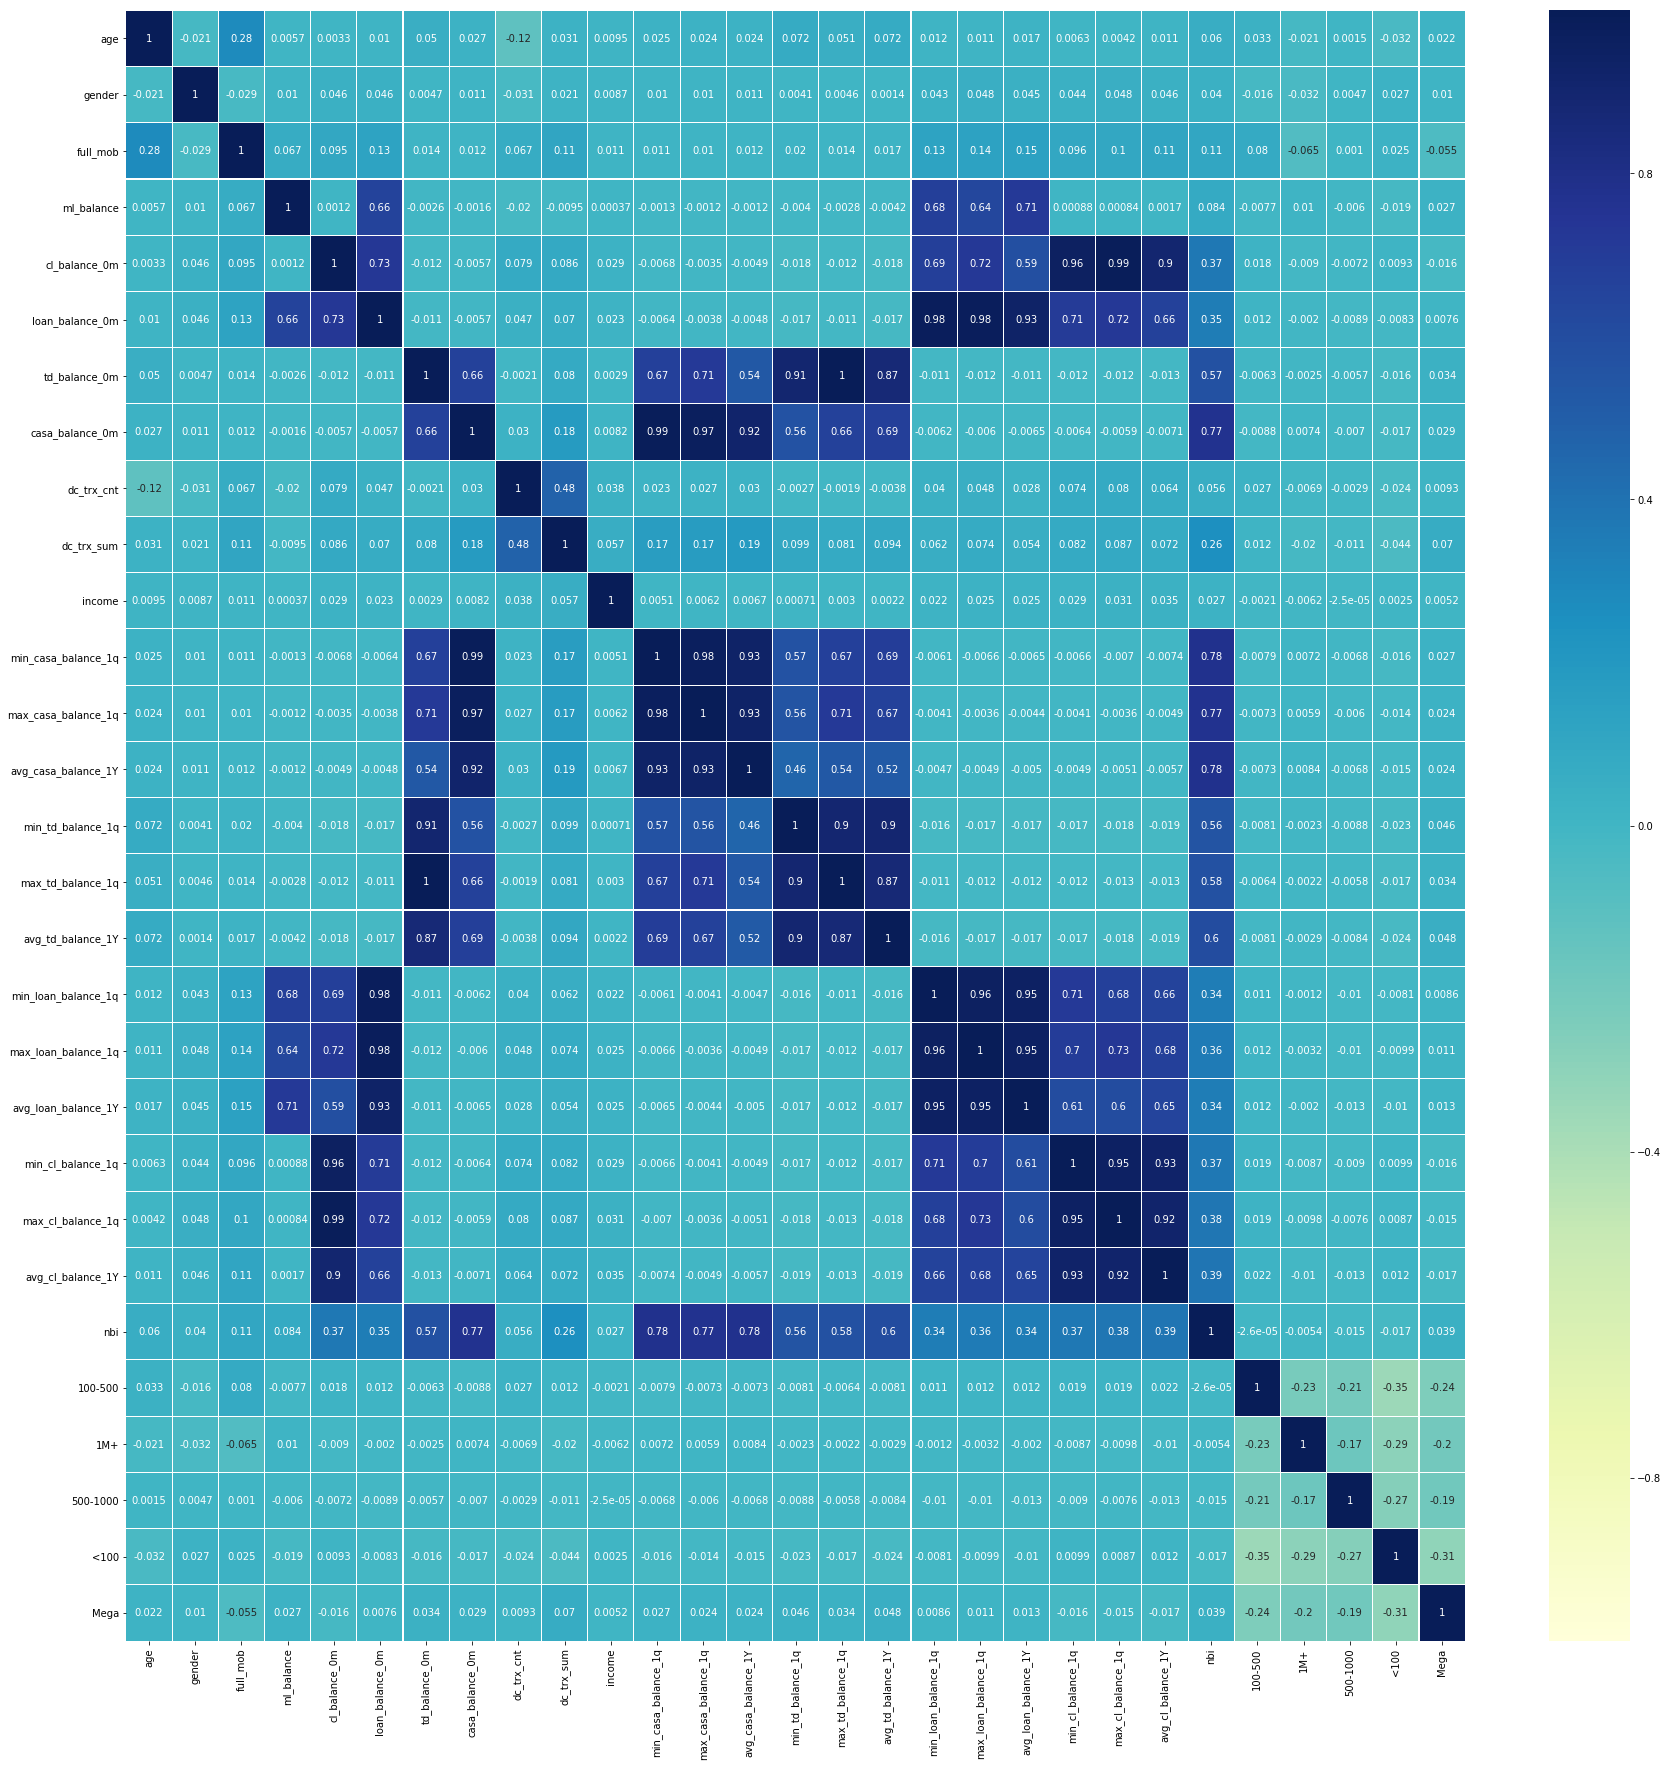

In [52]:
sns.heatmap(data_scaled.corr(),cmap="YlGnBu", vmin=-1, vmax=1,  linewidths=0.1, annot=True)
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

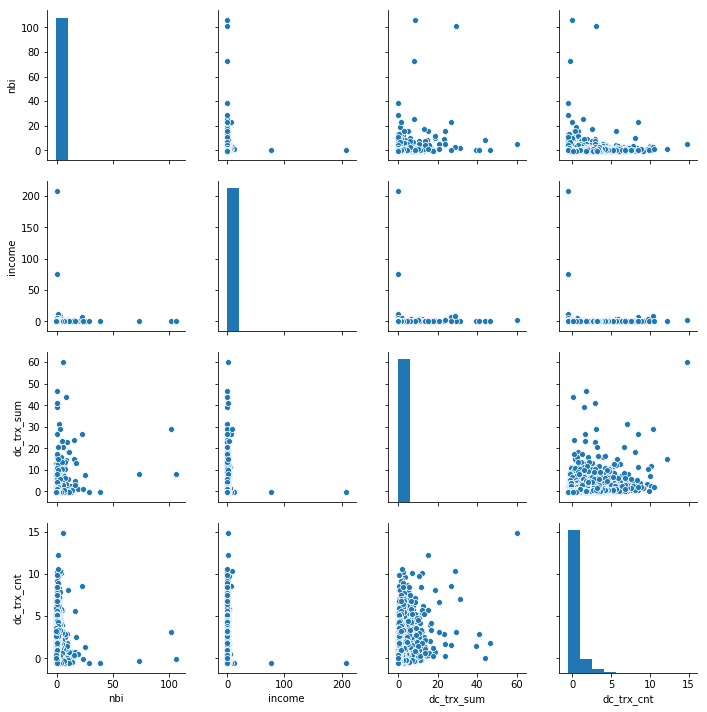

In [56]:
sns.pairplot(data_scaled[['nbi','income','dc_trx_sum','dc_trx_cnt']])

### Для проведения кластеризации возьмем выборку данных по доходам клиента и сумма трат по картам

Подбор оптимального кол-ва кластеров.
KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_

Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$
Оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [72]:
X=data_scaled[['income','dc_trx_sum']]

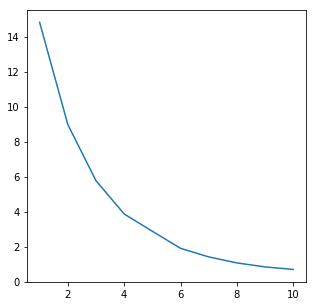

In [75]:
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

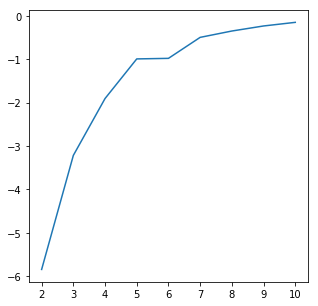

In [76]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

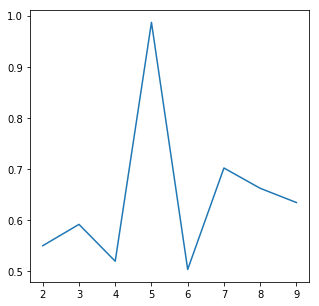

In [77]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [78]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

6

Text(0, 0.5, 'dc_trx_sum')

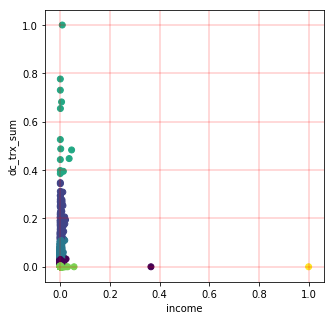

In [88]:
from sklearn.cluster import KMeans

KM=KMeans(n_clusters=k_opt)
y_pred=KM.fit_predict(X)
plt.scatter(X['income'],X['dc_trx_sum'], c=y_pred )
plt.grid(color='r', linestyle='-', linewidth=0.3)
plt.xlabel('income')
plt.ylabel('dc_trx_sum')

In [82]:
# Метрика оценки качества выбора оптимального кол-ва кластеров
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

0.7344189668716385

In [86]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])